# Project: Wrangle and Analyze Data
## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
        <li><a href="#assessingsum">Assessing Summary</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#analysis">Data Analysis</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

> In the following project I am going to gather and analyze data all around the Twitter account <a href = "https://twitter.com/dog_rates?lang=de">"WeRateDogs"</a>. For that, data is gathered via manual download, programmatical download and over an API. After that I am going to assess this data, define the issues found during the assessment and clean these issues to get a cleaned master dataframe. 
<a id='sources'></a>
#### Data used


>1. **Name:** WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)</li>
><ul>   
>    <li><b>Source:</b> <a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive->enhanced/twitter-archive-enhanced.csv">downloaded from Udacity</a></li>    

</ul>

>2. **Name:** Tweet image predictions (image_predictions.tsv)</li>
><ul>   
>    <li><b>Source:</b> <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image->predictions.tsv">Programmatically downloaded via Requests from Udacity</a></li>     
></ul>

>3. **Name:** Additional Twitter data (tweet_json.txt)
><ul>   
>    <li><b>Source:</b> <a href = "https://twitter.com/dog_rates">API via Tweepy, WeRateDogs™ Archive</a></li>    


</ul>


#### 1. Loading Libraries

In [36]:
import pandas as pd 
import numpy as np 
import tweepy #twitter API
import json #handle json data
import requests #download data
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import re #text processing


### 2. Gathering Data



#### A. Importing Enhanced Twitter Archive

In [37]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv") #should download locally through the link

# inspecting the data visually
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### B. Tweet image predictions (image_predictions.tsv)



In [38]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)

#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [39]:
image_data = pd.read_csv("image_predictions.tsv", sep='\t')

image_data.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### C. Additional Twitter data (tweet_json.txt)

In [40]:
# Read the tweet-json.txt file line by line 
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()

In [41]:
id_list = []
retweet_list = []
fav_list = []

for line in lines:
    line_json = json.loads(line)
    id_list.append(line_json['id_str'])
    retweet_list.append(line_json['retweet_count'])
    fav_list.append(line_json['favorite_count'])

In [42]:
print(len(id_list), len(retweet_list), len(fav_list))

2354 2354 2354


In [43]:
# Creating the tweet_df dataframe
tweet_dic = {
    'tweet_id': id_list,
    'retweet_count':retweet_list,
    'favorite_count': fav_list
}
tweet_data = pd.DataFrame.from_dict(tweet_dic)

In [44]:
# getting more info about the data
df_archive.shape


(2356, 17)

In [45]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [46]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


<a id='assessing'></a>
## Assessing the Data


Checking for issues with the quality or the tidiness of the data and its dimensions.


#### A. twitter_data


Let's first look for missing data.

In [47]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


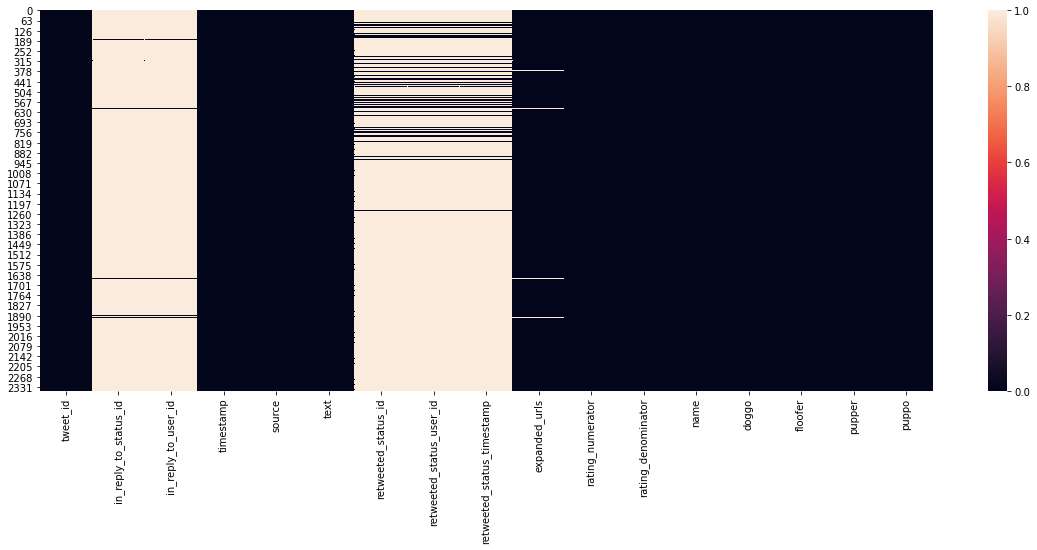

In [48]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_archive.isnull(), vmin=0, vmax = 1)

- looks like the reply and retweeted status columns have a lot of missing data. 
- we will have drop these columns and "expanded_urls" column since they are not relevant to our analysis 


In [49]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [50]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1106,734787690684657664,NaN,NaN,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734787690...,13,10,None,None,None,None,None
1967,673342308415348736,NaN,NaN,2015-12-06 03:24:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He's a skilled assassin pupper...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673342308...,10,10,Django,None,None,pupper,None
905,758099635764359168,NaN,NaN,2016-07-27 00:40:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",In case you haven't seen the most dramatic sne...,NaN,NaN,NaN,https://vine.co/v/hQJbaj1VpIz,13,10,None,None,None,None,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Cool dog. Enjoys couch. Low monotone bark. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482...,4,10,None,None,None,None,None
1845,675845657354215424,NaN,NaN,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,None,None,pupper,None


Visually inspecting the dataframe, we can observe that:
- not all tweets could be classified as doggo, floofer, pupper or puppo and all columns contain "None"
- the source contains unnecessary HTML code
- there is the name "None" in the name column

In [51]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

the datatypes are incorrect:
- tweet_id should be a str
- timestamp - columns should be datetime objects



#### B. Accessing the tweet image prediction

In [52]:
image_data.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
671,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,cocker_spaniel,0.901392,True,soft-coated_wheaten_terrier,0.028605,True,miniature_schnauzer,0.017805,True
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True
1928,858107933456039936,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,golden_retriever,0.863874,True,Labrador_retriever,0.015920,True,doormat,0.010615,False
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True
190,669393256313184256,https://pbs.twimg.com/media/CUopnHPVEAAcL2o.jpg,1,cocker_spaniel,0.359843,True,Blenheim_spaniel,0.139519,True,toy_poodle,0.132746,True
785,690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,motor_scooter,0.382690,False,moped,0.318017,False,pickup,0.040625,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
187,669367896104181761,https://pbs.twimg.com/media/CUoSjTnWwAANNak.jpg,1,basset,0.749394,True,beagle,0.133579,True,Welsh_springer_spaniel,0.030198,True
467,675047298674663426,https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg,1,Samoyed,0.978007,True,chow,0.007121,True,Pomeranian,0.006398,True


observation:
- the predicitions can be lowercase or uppercase

- there is an underscore instead of a whitespace between the words

- there are rows with no prediciton of a dog (neither in 1, 2 nor 3)

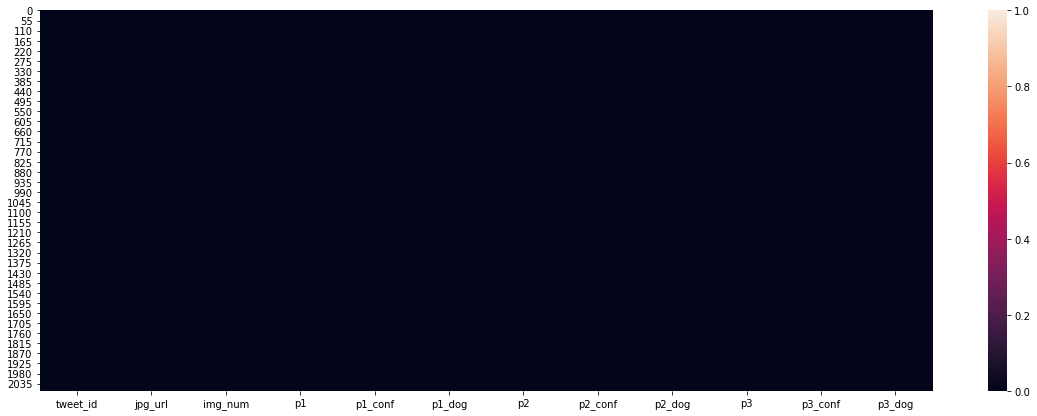

In [53]:
# Let see missing values
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(image_data.isnull(), vmin = 0, vmax = 1)

oh, looks fine. 

In [54]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### C. Accessing Twitter Data From Twitter API

In [55]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [56]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
2235,668142349051129856,306,592
1737,679511351870550016,1461,3711
1028,745433870967832576,2894,7824
1867,675153376133427200,2734,6072
1518,690728923253055490,597,2384
765,777684233540206592,3403,12518
1240,711998809858043904,138,0
1673,682242692827447297,1341,3566
2169,669328503091937280,452,1081
1212,715200624753819648,2110,5578


In [57]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Quality Issues



##### `df_twitter` table
- invalid tweet_id datatype (should be integer instead of string)
- the datatype of the timestamp - column is object and should be datetime
- some of the dogs are not classified as one of "doggo", "floofer", "pupper" or "puppo" and contain all "None" instead
- Some dog names are invalid like 'a', 'an', 'the', 'such', etc.

##### `df_predict` table
- the datatype of the id - columns is integer and should be str
- contains retweets (duplicated rows in column `jpg_url`)
- the predictions are sometimes uppercase, sometimes lowercase
- also there is a "_" instead of a whitespace in the predictions

##### `df_api` table
- the datatype of the id - columns is integer and should be str




#### Tideness issues
- Pupper, floofer, doggo and puppo should be in one column
- All dataframes should be merged to one.

#### 4. Cleaning Data

In [58]:
clean_df_archive = df_archive.copy()
clean_tweet_data = tweet_data.copy()
clean_image_data = image_data.copy()

In [59]:
clean_df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [60]:
clean_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [61]:
clean_image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Let begin with the Tideness Issues 

#### Define

* Pupper, floofer, doggo and puppo should be merged into one column called dog_stage and drop the columns


#### Code

In [62]:
clean_df_archive['dog_stage'] = clean_df_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [63]:
# drop columns that are not needed
clean_df_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [64]:
clean_df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Define

* All dataframes should be merged to one.


#### Code

In [65]:
merged_df = clean_df_archive.merge(clean_image_data, how ='outer', on = 'tweet_id')
merged_df.tweet_id = merged_df.tweet_id.astype(str)
merged_df = merged_df.merge(clean_tweet_data, how='outer', on= 'tweet_id')



#### Test

In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### Quality Issues

#### Define

* Drop retweet observations and related columns


#### Code

In [67]:
# The rows containing non null values for retweeted_status_id are retweet observations. 

merged_df = merged_df[merged_df.retweeted_status_id.isnull()]


In [86]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1976 non-null   object             
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              1976 non-null   datetime64[ns, UTC]
 4   source                 1976 non-null   object             
 5   text                   1976 non-null   object             
 6   expanded_urls          1976 non-null   object             
 7   rating_numerator       1976 non-null   int64              
 8   rating_denominator     1976 non-null   int64              
 9   name                   1976 non-null   object             
 10  dog_stage              319 non-null    object             
 11  jpg_url                1976 non-null   object           

In [68]:
# The rows containing non null values for retweeted_status_id are retweet observations. 

merged_df = merged_df.drop(columns=['retweeted_status_id', 
                                    'retweeted_status_user_id', 'retweeted_status_timestamp'])                                   

#### Test

In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  jpg_url                1994 non-null   object 
 12  img_num                1994 non-null   float64
 13  p1                     1994 non-null   object 
 14  p1_conf                1994 non-null   float64
 15  p1_d

#### Define
* Convert incorrect names to NAN and extract the correct names from the text column

#### Code

In [70]:
merged_df.name[merged_df.name.str.islower()] = merged_df.name[merged_df.name.str.islower()].replace(r'^[a-z]+', 'None', regex= True)

<ipython-input-70-d99d63cbcece>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.name[merged_df.name.str.islower()] = merged_df.name[merged_df.name.str.islower()].replace(r'^[a-z]+', 'None', regex= True)


#### Test

In [71]:
merged_df.name[merged_df.name.str.islower()].count()

0

#### Define
There are multiple Denominator ratings.

#### Code

In [72]:
# Drop all rows with rating_denominator other than 10
merged_df = merged_df[merged_df.rating_denominator == 10]

#### Test

In [73]:
merged_df.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

#### Define
Conert invalid tweet_id data type (integer instead of string) to string

#### Code

In [74]:
# convert tweet_id to string 
merged_df.tweet_id = merged_df.tweet_id.astype(str)

#### Test

In [75]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2153 non-null   object 
 1   in_reply_to_status_id  73 non-null     float64
 2   in_reply_to_user_id    73 non-null     float64
 3   timestamp              2153 non-null   object 
 4   source                 2153 non-null   object 
 5   text                   2153 non-null   object 
 6   expanded_urls          2099 non-null   object 
 7   rating_numerator       2153 non-null   int64  
 8   rating_denominator     2153 non-null   int64  
 9   name                   2153 non-null   object 
 10  dog_stage              357 non-null    object 
 11  jpg_url                1976 non-null   object 
 12  img_num                1976 non-null   float64
 13  p1                     1976 non-null   object 
 14  p1_conf                1976 non-null   float64
 15  p1_d

#### Define
correct invalid data type by converting timestamp to datetime

#### Code

In [76]:
merged_df.timestamp = pd.to_datetime(merged_df.timestamp)

#### Test

In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2153 non-null   object             
 1   in_reply_to_status_id  73 non-null     float64            
 2   in_reply_to_user_id    73 non-null     float64            
 3   timestamp              2153 non-null   datetime64[ns, UTC]
 4   source                 2153 non-null   object             
 5   text                   2153 non-null   object             
 6   expanded_urls          2099 non-null   object             
 7   rating_numerator       2153 non-null   int64              
 8   rating_denominator     2153 non-null   int64              
 9   name                   2153 non-null   object             
 10  dog_stage              357 non-null    object             
 11  jpg_url                1976 non-null   object           

#### Define
Delete rows with missing photos

#### Code

In [78]:
merged_df = merged_df[merged_df.jpg_url.notnull()]

#### Test

In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1976 non-null   object             
 1   in_reply_to_status_id  22 non-null     float64            
 2   in_reply_to_user_id    22 non-null     float64            
 3   timestamp              1976 non-null   datetime64[ns, UTC]
 4   source                 1976 non-null   object             
 5   text                   1976 non-null   object             
 6   expanded_urls          1976 non-null   object             
 7   rating_numerator       1976 non-null   int64              
 8   rating_denominator     1976 non-null   int64              
 9   name                   1976 non-null   object             
 10  dog_stage              319 non-null    object             
 11  jpg_url                1976 non-null   object           

#### Define
Convert P lowercase to uppercase


#### Code

In [80]:
merged_df.p1 = merged_df.p1.str.title()
merged_df.p2 = merged_df.p1.str.title()
merged_df.p3 = merged_df.p1.str.title()



In [81]:
merged_df.p1.head(10)

0                      Orange
1                   Chihuahua
2                   Chihuahua
3                 Paper_Towel
4                      Basset
5    Chesapeake_Bay_Retriever
6                 Appenzeller
7                  Pomeranian
8               Irish_Terrier
9                    Pembroke
Name: p1, dtype: object

#### 5. Storing Data

In [82]:
merged_df.to_csv('twitter-archive-master.csv', index = False)

#### 6. Analysis and Visualization

A. The percentage of different dog stages

In [83]:
dog_stage_df = merged_df.dog_stage.value_counts()
dog_stage_df

pupper     217
doggo       71
puppo       28
floofer      3
Name: dog_stage, dtype: int64

(-1.1812071461173692,
 1.4180155613408847,
 -1.3355967431478069,
 1.2050972309844525)

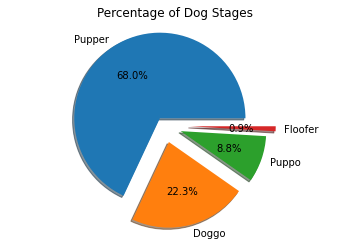

In [84]:
# let's visualize with a pie chart
plt.pie(dog_stage_df, labels =['Pupper', 'Doggo', 'Puppo', 'Floofer'], autopct = '%1.1f%%'
       , shadow=True, explode=(0.1,0.2,0.2,0.3))
plt.title('Percentage of Dog Stages')
plt.axis('equal')

**Observation**
1. Pupper has the highest Dog stages
2. Floofer has the lowest Dog stages


B. Relatinship between Retweet and Favorite count

Text(0, 0.5, 'Favorite Count')

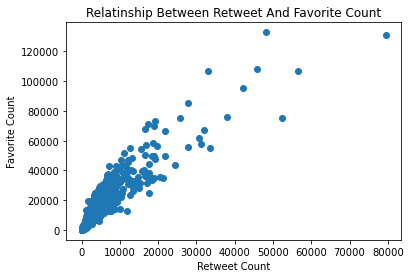

In [85]:
plt.scatter(merged_df.retweet_count, merged_df.favorite_count)
plt.title('Relatinship Between Retweet And Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

**Observation**


From the plot, we can say there is a linear relationship between the two parameters